In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load both dataset Student-math and Student-por
df_math = pd.read_csv('Student-mat.csv', sep=';')
df_port= pd.read_csv('Student-por.csv', sep=';')

print("Math Dataset Shape:", df_math.shape)
print("Portuguese Dataset Shape:", df_port.shape)

Math Dataset Shape: (395, 33)
Portuguese Dataset Shape: (649, 33)


In [4]:
print("\nMissing values (Math):\n", df_math.isnull().sum())
print("\nMissing values (Portuguese):\n", df_port.isnull().sum())


Missing values (Math):
 school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

Missing values (Portuguese):
 school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goo

In [5]:
# Handle outliers in 'G1', 'G2', 'G3' columns for both datasets
df_math = df_math[df_math['absences'] < 50]
df_port = df_port[df_port['absences'] < 50]


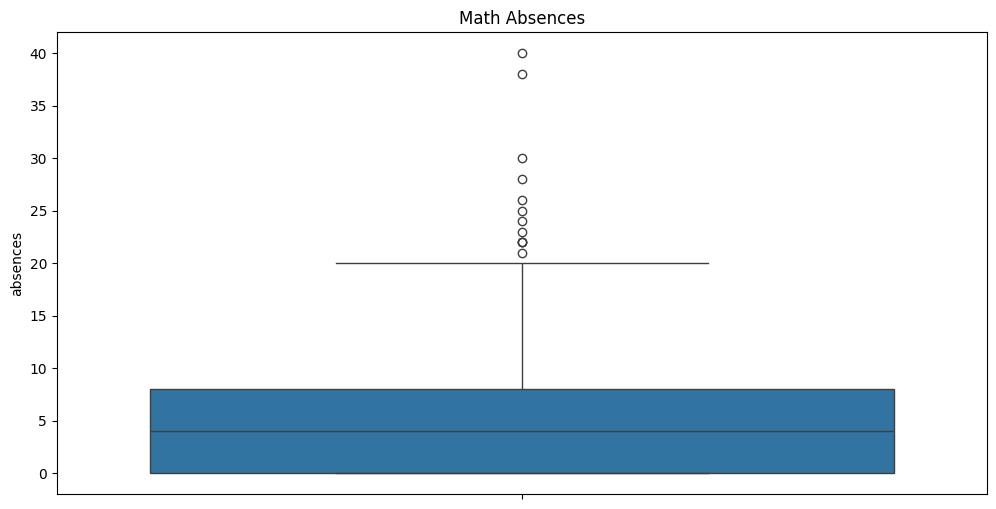

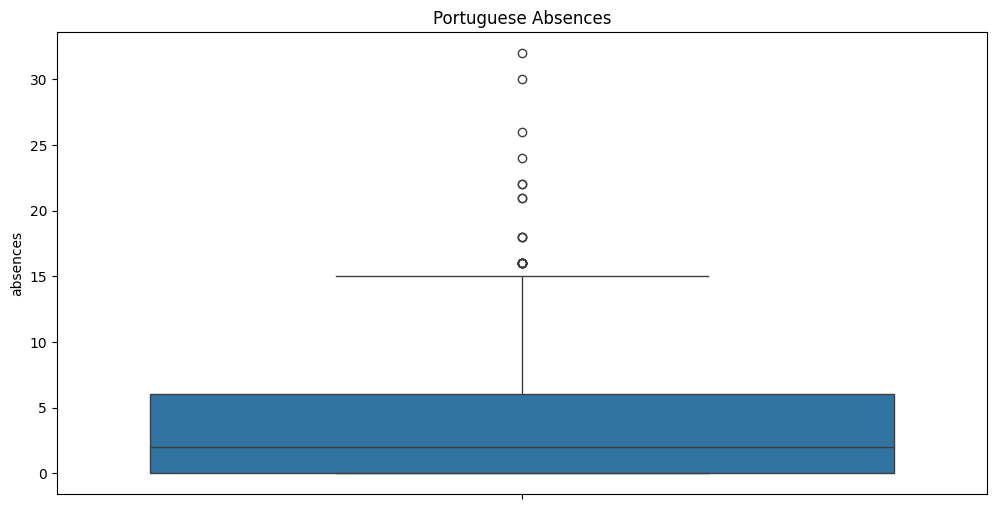

In [8]:
# Visualize the distribution of 'absences' in both datasets
plt.figure(figsize=(12, 6))
sns.boxplot(df_math['absences']); plt.title('Math Absences'); plt.show()
plt.figure(figsize=(12, 6))
sns.boxplot(df_port['absences']); plt.title('Portuguese Absences'); plt.show()

In [9]:
# Encode categorical variables for both datasets
df_math_encoded = pd.get_dummies(df_math, drop_first=True)
df_port_encoded = pd.get_dummies(df_port, drop_first=True)

In [10]:
# standardize numeric columns for both datasets
from sklearn.preprocessing import StandardScaler
import numpy as np
scaler = StandardScaler()
numeric_cols = ['age', 'absences', 'G1', 'G2', 'G3']

In [11]:
# scale the numeric columns
for df_encoded in [df_math_encoded, df_port_encoded]:
    existing_numeric = [col for col in numeric_cols if col in df_encoded.columns]
    df_encoded[existing_numeric] = scaler.fit_transform(df_encoded[existing_numeric])

In [13]:
print("\nCleaned Math dataset shape:", df_math_encoded.shape)
print("Cleaned Portuguese dataset shape:", df_port_encoded.shape)

# Save the cleaned datasets

df_math_encoded.to_csv("student-mat-cleaned.csv", index=False)
df_port_encoded.to_csv("student-por-cleaned.csv", index=False)


Cleaned Math dataset shape: (392, 42)
Cleaned Portuguese dataset shape: (649, 42)


# Conduct Exploratory Data Analysis (EDA)

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the both datasets
mat_df = pd.read_csv("student-mat.csv", sep=';')
por_df = pd.read_csv("student-por.csv", sep=';')


## Generate Descriptive Statistics

In [18]:
print("Math Dataset Summary:\n", mat_df.describe())
print("\n Portuguese Dataset Summary:\n", por_df.describe())


Math Dataset Summary:
               age        Medu        Fedu  traveltime   studytime    failures  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean    16.696203    2.749367    2.521519    1.448101    2.035443    0.334177   
std      1.276043    1.094735    1.088201    0.697505    0.839240    0.743651   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
50%     17.000000    3.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     3.944304    3.235443    3.108861    1.481013    2.291139    3.554430   
std 

In [17]:
print("Math Dataset: G3 Scores by Study Time\n")
print(mat_df.groupby('studytime')['G3'].describe())

print("\n Portuguese Dataset: G3 Scores by Study Time\n")
print(por_df.groupby('studytime')['G3'].describe())


Math Dataset: G3 Scores by Study Time

           count       mean       std  min   25%   50%   75%   max
studytime                                                         
1          105.0  10.047619  4.956311  0.0   8.0  10.0  13.0  19.0
2          198.0  10.171717  4.217537  0.0   8.0  11.0  13.0  19.0
3           65.0  11.400000  4.639504  0.0  10.0  12.0  15.0  19.0
4           27.0  11.259259  5.281263  0.0   9.0  12.0  14.5  20.0

 Portuguese Dataset: G3 Scores by Study Time

           count       mean       std  min   25%   50%   75%   max
studytime                                                         
1          212.0  10.844340  3.218624  0.0  10.0  11.0  13.0  18.0
2          305.0  12.091803  3.243125  0.0  10.0  12.0  14.0  19.0
3           97.0  13.226804  2.502104  8.0  12.0  13.0  15.0  18.0
4           35.0  13.057143  3.038410  6.0  11.0  13.0  15.0  19.0


# Visualize distributions and relationships among variables

## Distribution of Final Grades (G3)

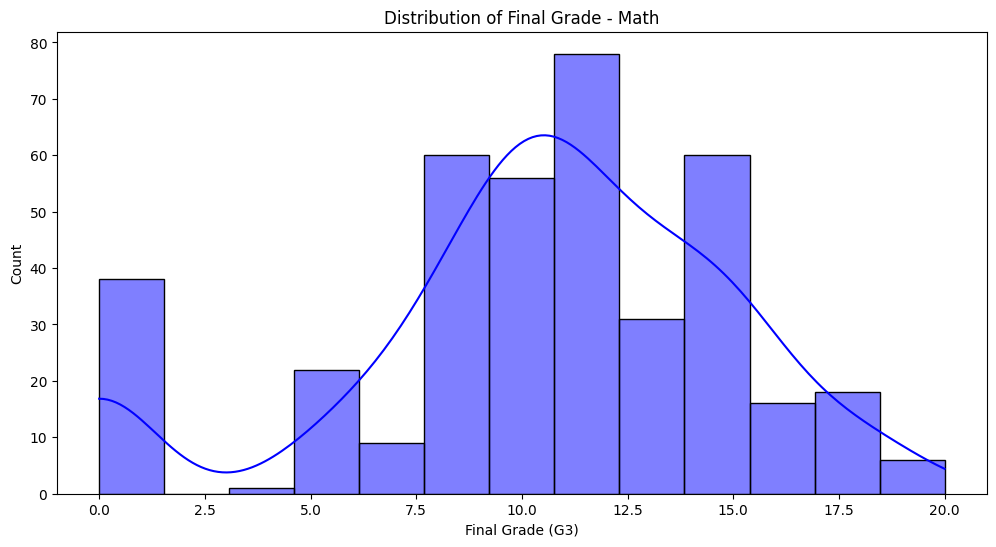

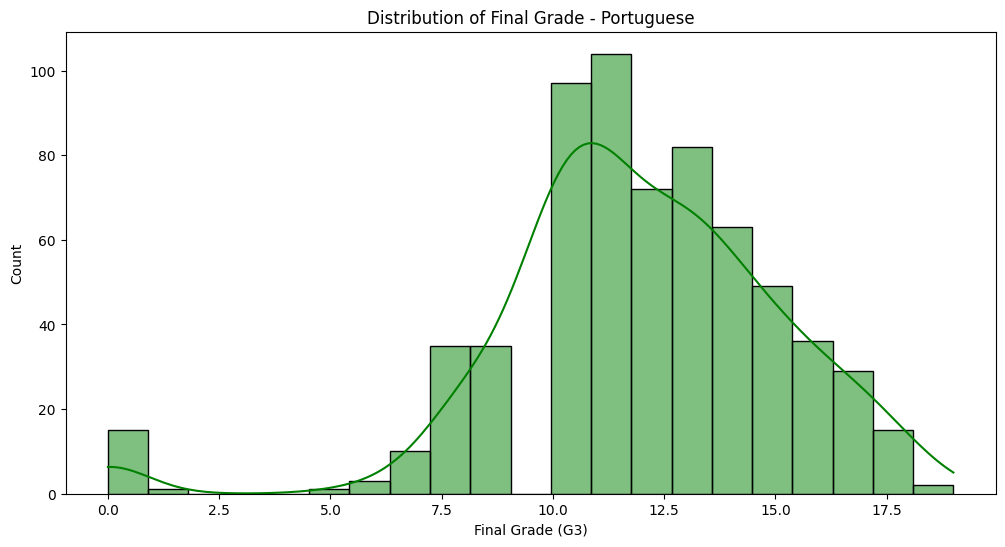

In [31]:
# Visualize the relationship between study time and final grade (G3) for both datasets
plt.figure(figsize=(12, 6))
sns.histplot(mat_df['G3'], kde=True, color='blue')
plt.title("Distribution of Final Grade - Math")
plt.xlabel("Final Grade (G3)")
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(por_df['G3'], kde=True, color='green')
plt.title("Distribution of Final Grade - Portuguese")
plt.xlabel("Final Grade (G3)")
plt.show()


## Study Time Distribution

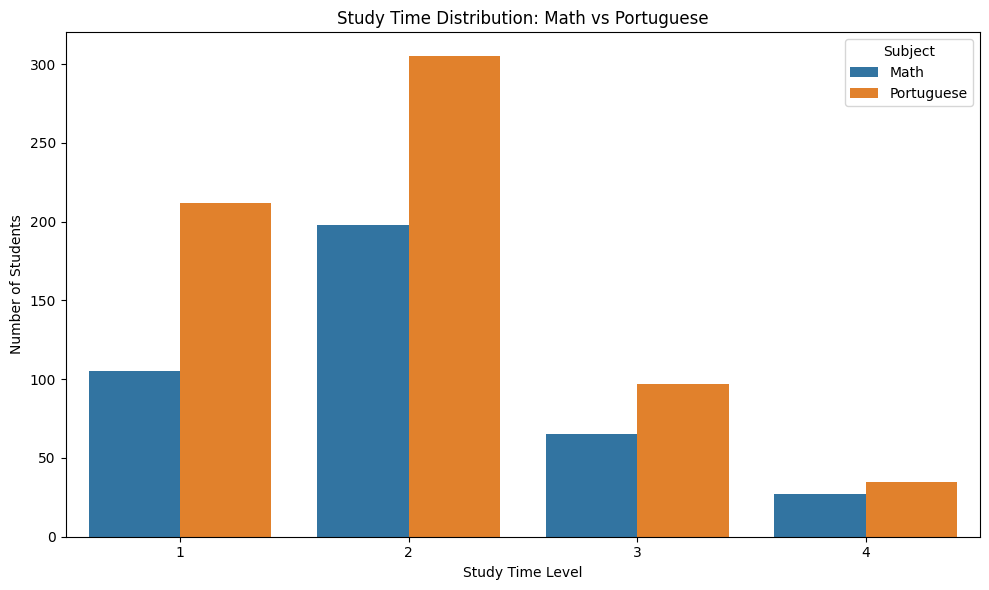

In [36]:
mat_df['subject'] = 'Math'
por_df['subject'] = 'Portuguese'
combined_df = pd.concat([mat_df, por_df], ignore_index=True)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(x='studytime', hue='subject', data=combined_df)

plt.title("Study Time Distribution: Math vs Portuguese")
plt.xlabel("Study Time Level")
plt.ylabel("Number of Students")
plt.legend(title='Subject')
plt.tight_layout()
plt.show()



##  Scatter Plot: Study Time vs Final Grade

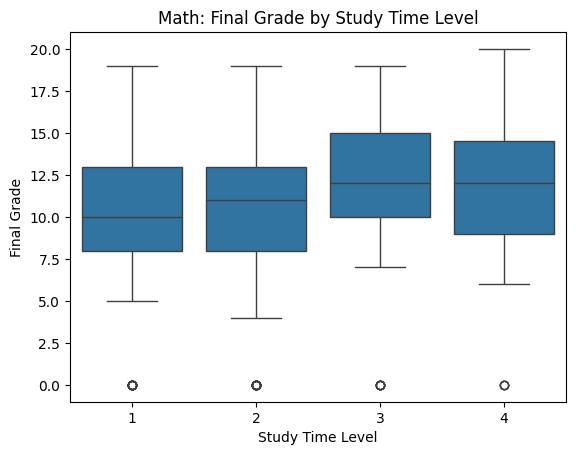

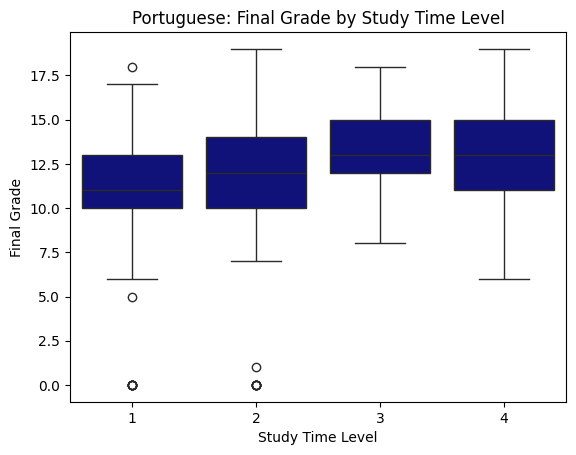

In [45]:
sns.boxplot(x='studytime', y='G3', data=mat_df)
plt.title("Math: Final Grade by Study Time Level")
plt.xlabel("Study Time Level")
plt.ylabel("Final Grade")
plt.show()

sns.boxplot(x='studytime', y='G3', data=por_df, color="darkblue")
plt.title("Portuguese: Final Grade by Study Time Level")
plt.xlabel("Study Time Level")
plt.ylabel("Final Grade")
plt.show()


## Heatmap: Correlation Matrix

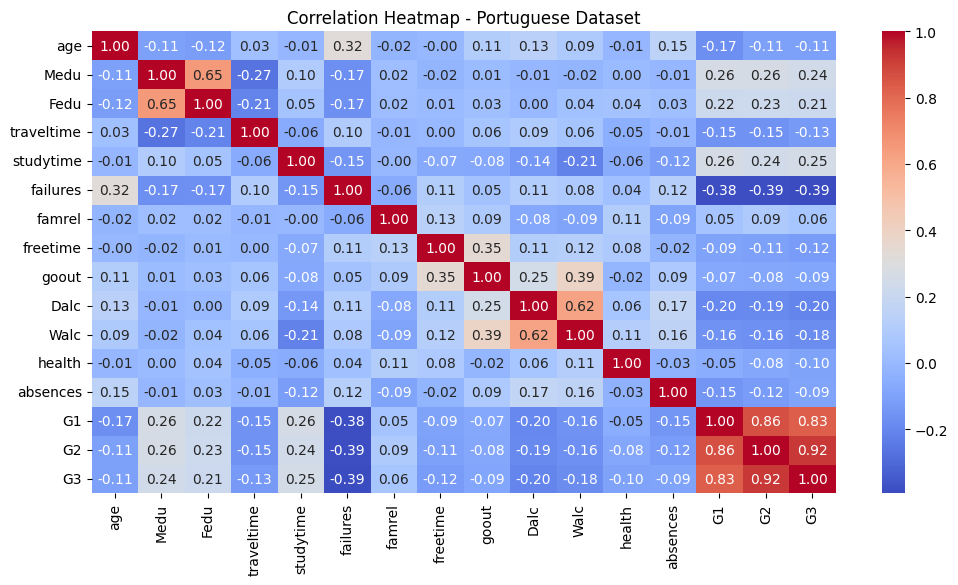

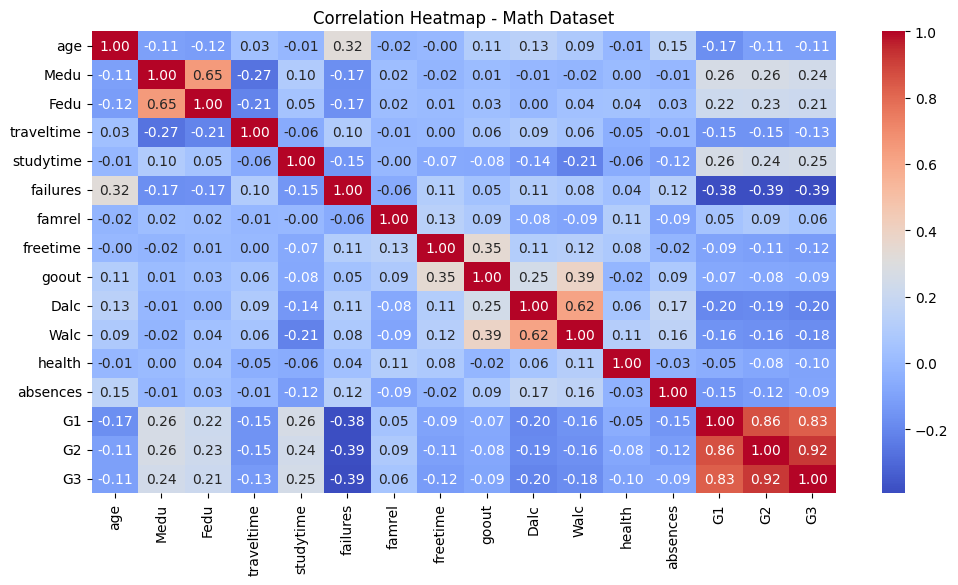

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
# Create a heatmap with annotations
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap - Portuguese Dataset")
plt.show()

# Plot correlation heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")

plt.title("Correlation Heatmap - Math Dataset")
plt.show()


# Compare Grade Averages per Study Time

In [53]:
# Group by studytime and calculate mean G3 for each dataset
math_avg = mat_df.groupby('studytime')['G3'].mean().round(2)
port_avg = por_df.groupby('studytime')['G3'].mean().round(2)

# Combine into a DataFrame
comparison_df = pd.DataFrame({
    'Avg. G3 (Math)': math_avg,
    'Avg. G3 (Portuguese)': port_avg
})

# Rename index for clarity
studytime_meaning = {
    1: '< 2 hours/week',
    2: '2 to 5 hours/week',
    3: '5 to 10 hours/week',
    4: '> 10 hours/week'
}
comparison_df.index = comparison_df.index.map(studytime_meaning)

print(comparison_df)


                    Avg. G3 (Math)  Avg. G3 (Portuguese)
studytime                                               
< 2 hours/week               10.05                 10.84
2 to 5 hours/week            10.17                 12.09
5 to 10 hours/week           11.40                 13.23
> 10 hours/week              11.26                 13.06


# Apply a Machine Learning or Clustering Model


--- ANALYSIS FOR PORTUGUESE ---
Regression Model Performance (Portuguese):
 - Mean Squared Error: 1.33
 - R-squared: 0.86
Regression Coefficients:
     Feature  Coefficient
0  studytime     0.114165
1   failures    -0.153936
2   absences     0.025192
3         G1     0.181200
4         G2     0.872573


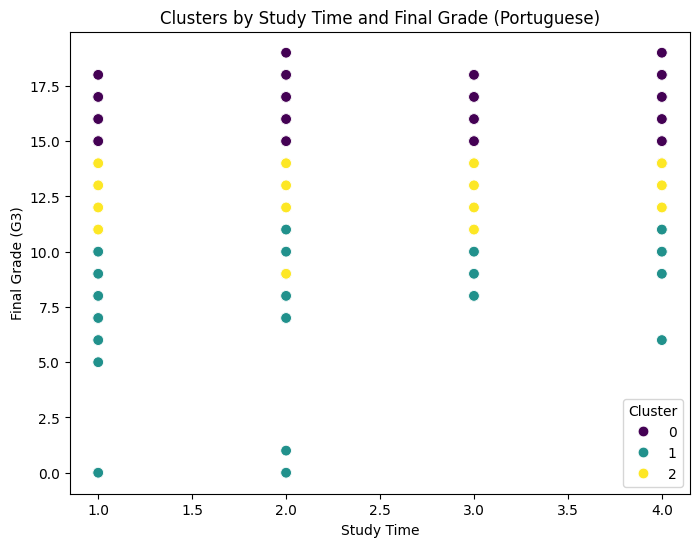


--- ANALYSIS FOR MATHEMATICS ---
Regression Model Performance (Mathematics):
 - Mean Squared Error: 4.47
 - R-squared: 0.78
Regression Coefficients:
     Feature  Coefficient
0  studytime    -0.071231
1   failures    -0.455813
2   absences     0.039245
3         G1     0.144463
4         G2     0.979615


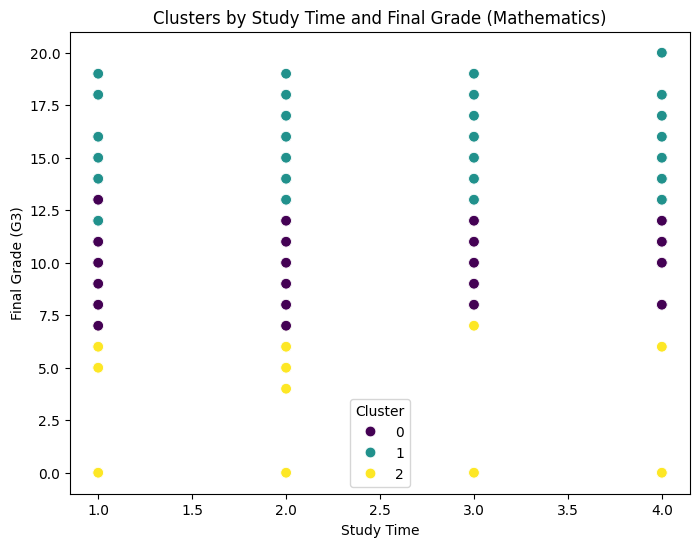

In [55]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

def run_analysis(dataset_path, subject_name):
    print(f"\n--- ANALYSIS FOR {subject_name.upper()} ---")

    # Load dataset
    df = pd.read_csv(dataset_path, sep=';')

    # Features and target for regression
    features = ['studytime', 'failures', 'absences', 'G1', 'G2']
    X = df[features]
    y = df['G3']

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train regression model
    reg = LinearRegression()
    reg.fit(X_train, y_train)

    # Predict & evaluate
    y_pred = reg.predict(X_test)
    print(f"Regression Model Performance ({subject_name}):")
    print(f" - Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}")
    print(f" - R-squared: {r2_score(y_test, y_pred):.2f}")

    # Coefficients
    coef_df = pd.DataFrame({'Feature': features, 'Coefficient': reg.coef_})
    print("Regression Coefficients:")
    print(coef_df)

    # Clustering
    cluster_features = ['studytime', 'G1', 'G2', 'G3']
    X_cluster = df[cluster_features]

    kmeans = KMeans(n_clusters=3, random_state=42)
    df['cluster'] = kmeans.fit_predict(X_cluster)

    # Plot clusters
    plt.figure(figsize=(8,6))
    sns.scatterplot(data=df, x='studytime', y='G3', hue='cluster', palette='viridis', s=60)
    plt.title(f'Clusters by Study Time and Final Grade ({subject_name})')
    plt.xlabel('Study Time')
    plt.ylabel('Final Grade (G3)')
    plt.legend(title='Cluster')
    plt.show()

# Run for Portuguese
run_analysis('student-por.csv', 'Portuguese')

# Run for Mathematics
run_analysis('student-mat.csv', 'Mathematics')


In [57]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Assuming you already have y_test and y_pred from your trained model

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R²): {r2:.2f}")


Model Evaluation Metrics:
Mean Squared Error (MSE): 1.33
Root Mean Squared Error (RMSE): 1.15
Mean Absolute Error (MAE): 0.75
R-squared (R²): 0.86


In [61]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd

# Example: Load dataset (replace with your own)
df = pd.read_csv('student-por.csv', sep=';')

# Select features for clustering
X_cluster = df[['studytime', 'G1', 'G2', 'G3']]

# Create and fit KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(X_cluster)

# Calculate Silhouette Score
score = silhouette_score(X_cluster, cluster_labels)
print(f"Silhouette Score: {score:.2f}")


Silhouette Score: 0.39


In [63]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor

def train_ensemble_regressor(X_train, y_train, X_test, y_test):
    # Define base regressors
    lr = LinearRegression()
    rf = RandomForestRegressor(random_state=42)
    gb = GradientBoostingRegressor(random_state=42)

    # Create ensemble model
    ensemble = VotingRegressor([('lr', lr), ('rf', rf), ('gb', gb)])
    ensemble.fit(X_train, y_train)

    # Predict and evaluate
    y_pred = ensemble.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print("\nEnsemble Regressor Performance:")
    print(f"RMSE: {rmse:.2f}")
    print(f"R2: {r2:.2f}")

    return ensemble


In [64]:
def add_study_efficiency(df):
    # Ratio of G2 (midterm) to study time - higher means more efficient studying
    df['study_efficiency'] = df['G2'] / df['studytime'].replace(0, 1)  # avoid divide by zero
    return df


In [66]:


def explain_model_with_shap(model, X_train):
    explainer = shap.Explainer(model.predict, X_train)
    shap_values = explainer(X_train)
    shap.summary_plot(shap_values, X_train)


In [67]:
from sklearn.cluster import DBSCAN

def dbscan_clustering(df, features):
    X = df[features]
    db = DBSCAN(eps=1.5, min_samples=5)
    clusters = db.fit_predict(X)
    df['dbscan_cluster'] = clusters
    n_noise = sum(clusters == -1)
    print(f"DBSCAN detected {n_noise} noise points (outliers).")
    return df


In [69]:
df.to_csv("student_performance_cleaned.csv", index=False)
